In [ ]:
%pip install matplotlib
%pip install pandas
%pip install numpy 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
#load data into DataFrame
df=pd.read_csv(r"C:\Users\Hp\Downloads\mentalhealth.csv")

# delete rows with zero 
df=df.dropna()


In [4]:
#check data types
df.dtypes

Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors                int64
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object

In [5]:
# check info
print(df.info())

# check the columns
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 287162 entries, 3 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                287162 non-null  object
 1   Gender                   287162 non-null  object
 2   Country                  287162 non-null  object
 3   Occupation               287162 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           287162 non-null  object
 6   treatment                287162 non-null  object
 7   Days_Indoors             287162 non-null  int64 
 8   Growing_Stress           287162 non-null  object
 9   Changes_Habits           287162 non-null  object
 10  Mental_Health_History    287162 non-null  object
 11  Mood_Swings              287162 non-null  object
 12  Coping_Struggles         287162 non-null  object
 13  Work_Interest            287162 non-null  object
 14  Social_Weakness          

In [6]:
# stats summary
print(df.describe())

        Days_Indoors
count  287162.000000
mean        2.963205
std         1.420193
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000


In [7]:
# check missing data
missing_values = df.isnull().sum()
print(missing_values) 

Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [8]:
# check duplicate data 
duplicate_rows = df[df.duplicated()]
print("Duplicated ROWS:")
print(duplicate_rows)

Duplicated ROWS:
                Timestamp  Gender         Country Occupation self_employed  \
18274  8/27/2014 11:37:59  Female   United States  Corporate            No   
18275  8/27/2014 11:43:36  Female   United States  Corporate            No   
18276  8/27/2014 11:49:51  Female          Poland  Corporate            No   
18277  8/27/2014 11:51:34  Female       Australia  Corporate            No   
18278  8/27/2014 11:52:41  Female   United States  Corporate            No   
...                   ...     ...             ...        ...           ...   
51904   2/21/2015 5:11:37  Female   United States    Student            No   
51905   2/21/2015 9:18:20  Female  United Kingdom    Student            No   
51906  2/21/2015 18:54:12  Female         Ireland    Student            No   
51907   2/24/2015 8:54:35  Female  United Kingdom    Student            No   
51908  6/25/2015 12:24:31  Female   United States    Student            No   

      family_history treatment  Days_Indoors G

In [11]:
# find the unique data in dataframe
# exclude the timestamp
excluded_df = df.loc[:, df.columns !='Timestamp']

for col in excluded_df:
    uniq = excluded_df[col].unique()
    print(uniq)

['Female' 'Male']
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines']
['Corporate' 'Student' 'Business' 'Housewife' 'Others']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
[1 4 5 2 3]
['Yes' 'No' 'Maybe']
['No' 'Yes' 'Maybe']
['Yes' 'No' 'Maybe']
['Medium' 'Low' 'High']
['No' 'Yes']
['No' 'Maybe' 'Yes']
['Yes' 'No' 'Maybe']
['Maybe' 'No' 'Yes']
['Yes' 'Not sure' 'No']


In [ ]:
#change strings to numeric
df['treatment']=df['treatment'].replace({'Yes':1, 'No':0}).astype(int)
df['Changes_Habits']=df['Changes_Habits'].replace({'Maybe':2, 'Yes':1, 'No':0}).astype(int)
df['Mental_Health_History']=df['Mental_Health_History'].replace({'Maybe':2, 'Yes':1, 'No':0}).astype(int)
df['Mood_Swings']=df['Mood_Swings'].replace({'High':2, 'Medium':1, 'Low':0}).astype(int)
df['Work_Interest']=df['Work_Interest'].replace({'Maybe':2,'Yes':1, 'No':0}).astype(int)

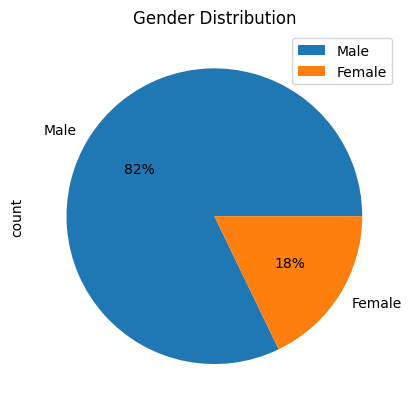

In [ ]:
# pie chart for Gender Distribution
explode = (0.03, 0.03, 0.03)
series = df["Gender"].value_counts()
series.plot(kind='pie', autopct = '%1.00f%%')
plt.title('Gender Distribution')
plt.legend(loc='best')
plt.show()

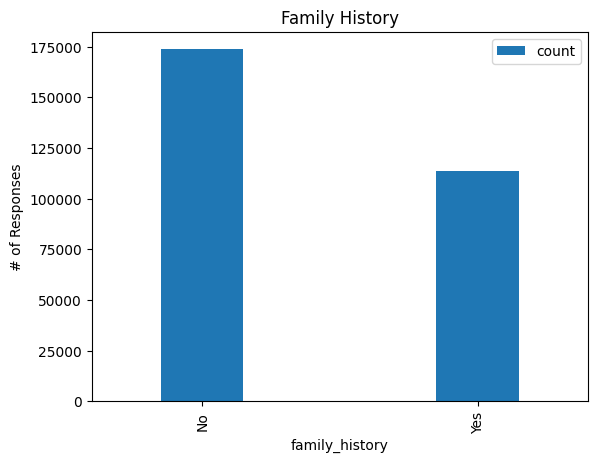

In [ ]:
# Chart of respondants with Family History
series = df["family_history"].value_counts()
series.plot(kind='bar', width = 0.3)
plt.title('Family History')
plt.ylabel('# of Responses')
plt.legend(loc='best')
plt.show()